# infos

In [ ]:
# Version 1.6 finale

# Notebook d'étude d'un modèle entrainé


### Changelogs :

v1.6 :
- Version finale, inclus la GradCam


v1.5 :
- Version pré-finale (Voir si possibilité d'ajouter un bloc GradCam)
- Ajout de l'image du modèle avec visual keras

v1.4 :
- Meilleure prise en charge du chargement du modèle et de son historique d'entrainement
- Ajout de commentaires dans le code
- Import des librairies déplacées : Appelées au fur et à mesure
- Ajout du DataGenerator pour l'évaluation de certains modèles

v1.3 :
- Certains noms de variables ont été modifiés pour une meilleure compéhrension
- Les fonctions perosnnalisées sont maintenant importées à partir d'une librairie construite 'fonctions'


v1.2 :
- Ajout du chargement de la variable history avec la librairie pickle
- Ajout de l'étude des courbes d'accuracy et de val_accuracy durant l'entrainement du modèle


v1.1 :
- Nettoyage du code pour livraison projet
- Ajout rapport de classification
- Ajout matrice de confusion


v1.0 :
- Chargement du modèle et tests sur images

# Configuration du notebook

In [1]:
from config import config_etude

chemin_images = '../../images'
chemin_csv = '../data/model_data_10_filtered.csv'

model_choice, history_path, img_dim, img_shape, batch_size = config_etude()

# Vérifier que les chemins soient correct avant toutes opérations


 Preciser le modèle à importer:
1. V1
2. V2

 
 Selection : V2 


 Version Base ou Fine tuned ?
1. Base
2. Fine Tuned
Modèle pré-entrainé : EfficientNetv2M 
Générateur : Dataset tensorflow 
Images : Triées 
Set de données : Full 
Undersample : Oui 
Augmentation : Oui 

Modèle chargé : V2 Fine tuned


# Librairies générales du notebook

In [2]:
# Librairies générales servant dans le notebook
import pandas as pd
import numpy as np
import tensorflow as tf
import requests
import cv2

# Chargement du DF

In [3]:
from fonctions_data import import_df
df, df_ech = import_df(chemin_images, chemin_csv)

Nombre d'images chargées pour df: 49861
Nb especes dans df: 10
Nombre d'images chargées pour df_ech: 4986
Nb especes dans df_ech: 10


# Chargement jeu de test

In [4]:
# Le dataset de test est construit sur la même architecture que les dataset train et validation réalisés durant l'entrainement
from fonctions_dataset import gen_dataset
dataset_test = gen_dataset(set = 'test',
                           training_data = df,
                           img_dim = img_dim,
                           augment = False,
                           normalize = False,
                           batch_size = batch_size)

target encodée: [5 9 9 ... 1 1 1]


# Chargement du modèle

In [5]:
from tensorflow.keras.models import load_model

# Charger le modèle entrainé
model = load_model(model_choice)


# Charger le modèle servant au transfert learning (pour visualisation)
base_model = tf.keras.applications.EfficientNetV2M(input_shape = img_shape,
                                                   include_top = False,
                                                   weights = 'imagenet')

## Visualisation modèle

In [6]:
from PIL import ImageFont
import visualkeras

### EfficientnetV2

In [74]:
base_model.summary()

Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 128, 128, 24)         648       ['rescaling[0][0]']           
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 128, 128, 24)         96        ['stem_conv[0][0]']           
 n)                                                                                

In [75]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(base_model,
                         legend=True,
                         font=font,
                         draw_volume=True,
                         spacing = 30)

### Modèle

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Function  (None, 8, 8, 1280)        53150388  
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 81920)             0         
                                                                 
 dropout (Dropout)           (None, 81920)             0         
                                                                 
 dense (Dense)               (None, 2048)              167774208 
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                        

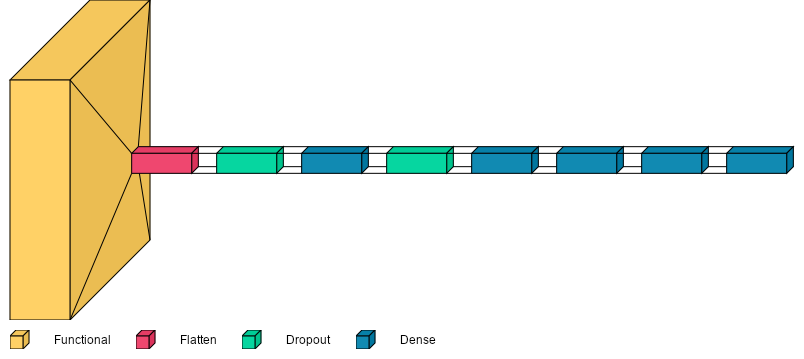

In [77]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True,
                         font=font,
                         draw_volume=True,
                         spacing = 25,
                         scale_xy=30,
                         scale_z = 10,
                         max_z = 60)

# Evaluation du modèle

In [6]:
# Chargement de l'historique d'entrainement du modèle :
import pickle
with open(history_path, 'rb') as file:
    history = pickle.load(file)

print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


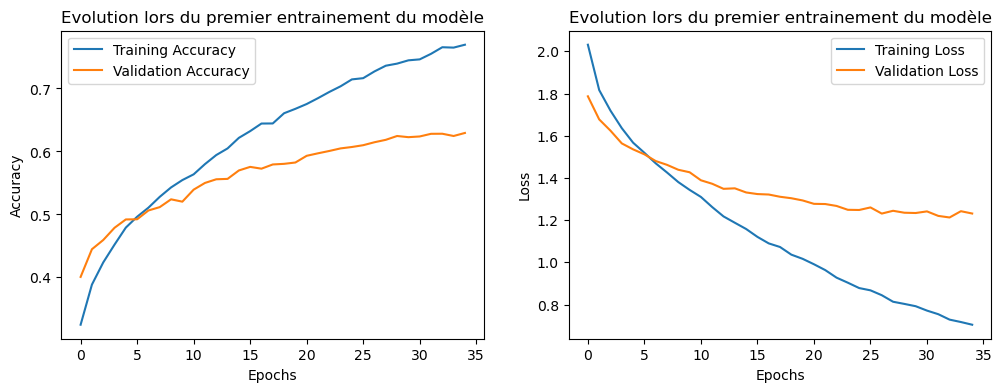

In [7]:
import matplotlib.pyplot as plt

# Courbes d'évolution de l'accuracy et de la val_accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Evolution lors du premier entrainement du modèle')
plt.legend()

# Courbes d'évolution de la loss et de la val_loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Evolution lors du premier entrainement du modèle')
plt.legend()
plt.show();

In [8]:
test_results = model.evaluate(dataset_test)
print("Resultats de la prediction:", test_results)

y_pred = model.predict(dataset_test)

47/47 [==============================] - 248s 5s/step - loss: 1.1999 - accuracy: 0.6230
Resultats de la prediction: [1.1999330520629883, 0.6229946613311768]
47/47 [==============================] - 243s 5s/step


In [9]:
# Rapport de classification
y_test = []
for _, label in dataset_test:
    y_test.extend(label.numpy())
y_test = np.array(y_test)


y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.61      0.60       256
           1       0.67      0.65      0.66       325
           2       0.65      0.52      0.58       405
           3       0.60      0.55      0.58       226
           4       0.59      0.71      0.65       212
           5       0.54      0.58      0.56       269
           6       0.70      0.67      0.69       275
           7       0.52      0.68      0.59       201
           8       0.60      0.58      0.59       320
           9       0.70      0.69      0.70       503

    accuracy                           0.62      2992
   macro avg       0.62      0.62      0.62      2992
weighted avg       0.63      0.62      0.62      2992



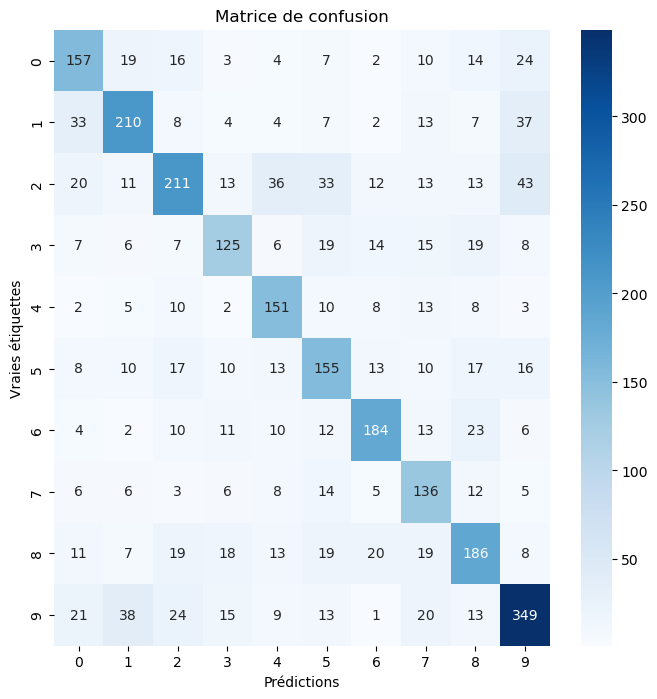

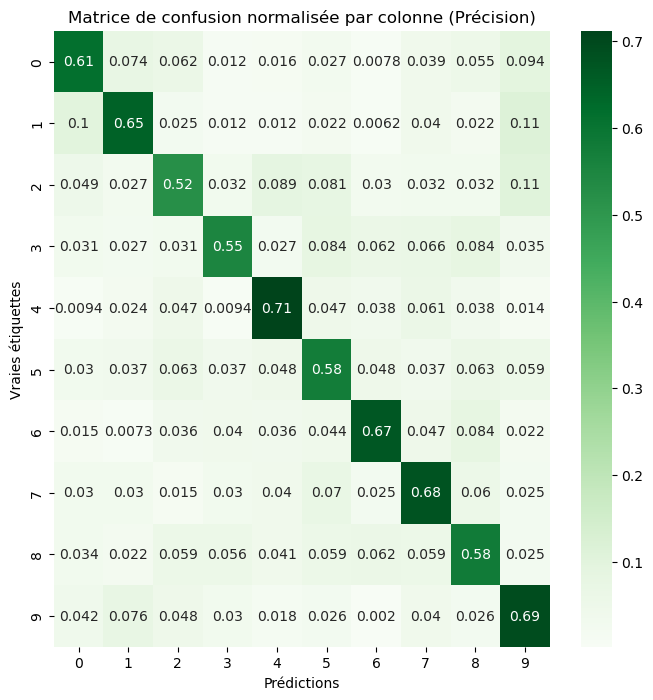

In [10]:
# Matrice de confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred_classes)
confusion_mtx_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

# Matrice de confusion
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

# Matrice de confusion normalisée
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx_normalized, annot=True, cmap='Greens')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion normalisée par colonne (Précision)')
plt.show()

# Predictions

In [11]:
nom_classes = {
    0: "Agaricus",
    1: "Amanita",
    2: "Cortinarius",
    3: "Entoloma",
    4: "Gymnopilus",
    5: "Inocybe",
    6: "Mycena",
    7: "Pluteus",
    8: "Psathyrella",
    9: "Russula"}

## Image aléatoire du dataset_test

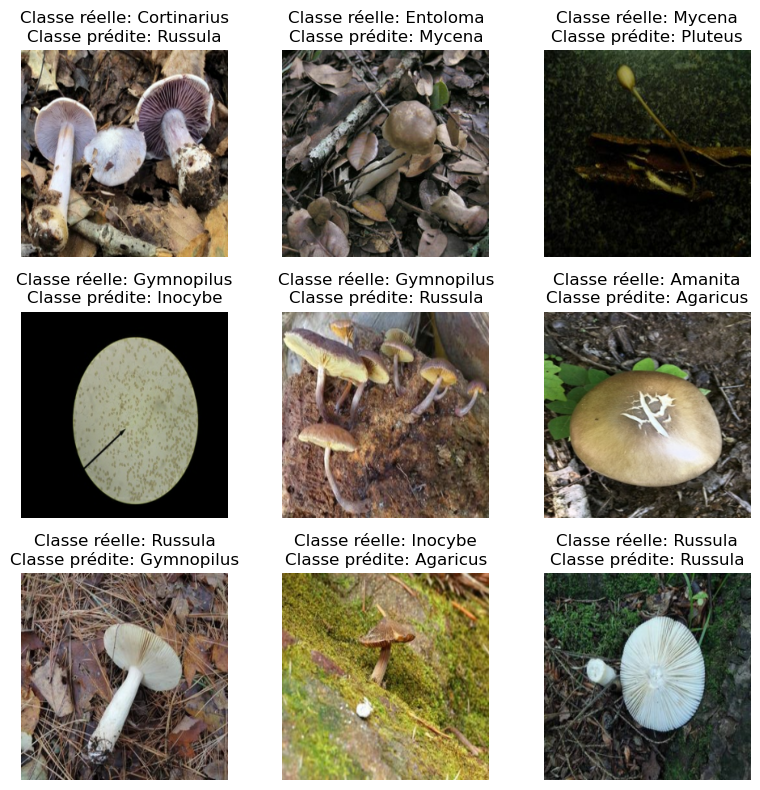

In [18]:
# Sélection de 9 indices aléatoires
random_indices = np.random.choice(len(dataset_test), 9, replace=False)

# Grille des plots
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# On affiche 9 images basées sur les indices aléatoires dans la grille
for i, idx in enumerate(random_indices):
    # L'itérateur est réinitialisé à chaque passage dans la boucle pour changer les images
    data_iterator = iter(dataset_test)
    for _ in range(idx + 1):
        image, label = next(data_iterator)
    
    # Normalisation des images
    image = image / 255.0

    # Construction des subplots
    row = i // 3
    col = i % 3
    
    # Classe réelle
    true_label = label[0].numpy()
    class_name_true = nom_classes[true_label]
    
    # Classe prédite
    predicted_label = np.argmax(y_pred[idx])
    class_name_pred = nom_classes[predicted_label]
    
    # Construction des graphs
    axes[row, col].imshow(image[0])
    axes[row, col].set_title(f"Classe réelle: {class_name_true}\nClasse prédite: {class_name_pred}")
    axes[row, col].axis('off')

# Affichage des images
plt.tight_layout()
plt.show()

## Image Web

In [13]:
from keras.preprocessing import image
from keras.applications.efficientnet_v2 import preprocess_input


# Modifier l'URL pour afficher une autre image à prédire
url = 'https://www.mycodb.fr/photos/Inocybe_asterospora_2002_dr_1.jpg'


# Chargement de l'image, pre-processing
response = requests.get(url)
if response.status_code == 200:
    image_data = response.content
    img_web = cv2.imdecode(np.frombuffer(image_data, np.uint8), cv2.IMREAD_COLOR)
    img_web = cv2.cvtColor(img_web, cv2.COLOR_BGR2RGB)
    img_web = cv2.resize(img_web, (256, 256))


    w = image.img_to_array(img_web)
    w = np.expand_dims(w, axis=0)
    w = preprocess_input(w)
    
    print("Image chargée sous la variable 'w'")

else:
    print(f"La requête a échoué avec le code d'état {response.status_code}")

Image chargée sous la variable 'w'


1/1 [==============================] - 1s 706ms/step


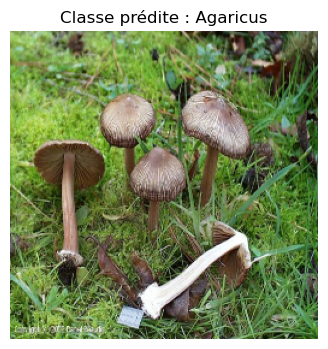

In [160]:
# Soumission de l'image au modèle pour prédiction
predictions_web = model.predict(w)
index_classe_web = np.argmax(predictions_web)
nom_classe_predite = nom_classes[index_classe_web]

# Obtenir la classe réelle par rapport au chemin de l'image
plt.figure(figsize=(4, 4))
plt.imshow(img_web)
plt.title(f'Classe prédite : {nom_classe_predite}')
plt.axis('off')
plt.show()

# GradCam

In [14]:
#import numpy as np
#import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
from PIL import Image

In [53]:
# Charger le modèle

# Modèle EfficientNetV2M
model = tf.keras.applications.EfficientNetV2M(weights="imagenet") # Garder les couches d'activation
model_shape = (480,480) # Shape en entrée du modèle
heatmap_shape=(15, 15)  # Shape de heatmap en sortie
conv_layer = 'efficientnetv2-m' # Dernière couche convolutive

In [49]:
# Image à visualiser
# img_path = '../../images/162.jpg'
img_path = '../../images/521174.jpg'
#img_path = '../../images/13101.jpg'

In [ ]:
# Pré-traitement de l'image
img = image.load_img(img_path, target_size=model_shape)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


# Prediction img
preds = model.predict(x)
predicted_class = np.argmax(preds[0])


# Calcul des gradients sur la dernière couche de convolution
with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer(conv_layer) 
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, predicted_class]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))


# Calculer la Grad-CAM
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Les dimensions de la heatmap doivent être redimensionnées
print(heatmap.shape)
heatmap = heatmap.reshape(heatmap_shape)  # On se base sur la shape de la heatmap

# Agrandissement de la heatmap pour la rendre plus 'visualisable'
scale = (img.size[1] / heatmap.shape[0], img.size[0] / heatmap.shape[1])
heatmap = zoom(heatmap, scale)


# Affichage de l'image et de la heatmap superposée
fig, ax = plt.subplots()
ax.imshow(np.array(img))
ax.imshow(heatmap, alpha=0.6, cmap='jet')

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

plt.show()
print("Classes prédites:", predicted_class)

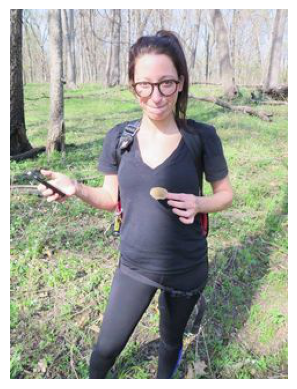

In [ ]:
img = Image.open(img_path)

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # pour masquer les axes
plt.show()